In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
X = 2* np.random.rand(100, 1)
y = 4+3*X + np.random.randn(100, 1)

In [4]:
y = 4+3*X + np.random.randn(100, 1)

In [5]:
#x0=1 
X_b = np.c_[np.ones((100, 1)), X]

#### 정규방정식 Normal Equation

In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[ 3.75860437],
       [ 3.06731619]])

In [8]:
X_new = np.array([[0], [2]])

In [9]:
X_new

array([[0],
       [2]])

In [10]:
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [11]:
X_new_b

array([[ 1.,  0.],
       [ 1.,  2.]])

In [12]:
y_predict = X_new_b.dot(theta_best)

In [13]:
y_predict

array([[ 3.75860437],
       [ 9.89323674]])

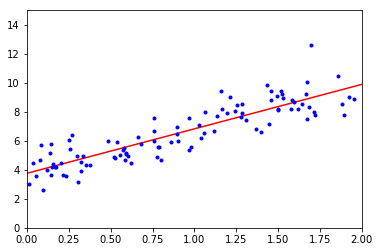

In [14]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

### 위와 같은 작업을 하는 Scikit-Learn 코드

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lin_reg = LinearRegression()

In [17]:
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 3.75860437]), array([[ 3.06731619]]))

In [18]:
lin_reg.predict(X_new)

array([[ 3.75860437],
       [ 9.89323674]])

### 계산복잡도
정규방정식을 계산하려면 역행렬을 계산해야함. <br>
그런데 역행렬의 계산은 Feature수가 2개로 들어나면 계산 시간은 8배 늘어남. <br>
샘플 수에 대해서는 선형적으로 증가함

계속 이렇게 정규방정식으로 구할수도 있으나, <br>
feature나 샘플 수가 매우 많으면 메모리에 부담될수 있음. <br>
다른 방법을 써보자

### Gradient Descent

기본 아이디어는, 비용함수 최적화하기 위해서 반복적으로 파라미터 조정하는 것

In [19]:
eta = 0.1
n_iterations = 100
m =100

In [20]:
theta = np.random.randn(2, 1) # 무작위 초기화

In [21]:
for iteration in range(n_iterations):
    gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta -eta*gradients

In [22]:
theta 

array([[ 3.74957642],
       [ 3.07561366]])

반복횟수는 어떻게 지정할까?<br>
벡터의 norm 이 어떤 허용오차보다 작아지면 경사하강법이 거의 <br>
최솟값에 도달한 것이므로 알고리즘 중지시킴<br>

#### 확률적 경사하강법 
매 스텝에서 딱 한개의 샘플만 무작위로 선택하고 그 하나의 샘플에 대한 GD만을 시행. 

In [23]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케쥴 하이퍼파라미터
m = 100

In [24]:
def learning_schedule(t):
    return t0/(t+t1)

In [25]:
theta = np.random.randn(2, 1) #random initialization

In [26]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradients

In [27]:
theta

array([[ 3.71143801],
       [ 3.08056589]])

In [28]:
from sklearn.linear_model import SGDRegressor

In [29]:
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [30]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [31]:
y.ravel()

array([  8.78363805,   3.98479938,   6.82860536,   5.56827146,
         4.97237051,   6.56145533,   3.03883801,   5.78035316,
         5.93449803,   8.14502421,  10.05185711,   7.46316661,
         9.02831209,   5.56329607,   6.00378609,   3.57169087,
         3.13149137,   9.2390755 ,   9.45142275,   8.22910243,
         7.75053624,   8.19747013,   4.19164292,   7.47670033,
         8.17273182,   7.62840666,   4.69652982,   5.72939339,
         5.3347382 ,   4.6569863 ,   6.64183272,   8.55267646,
         9.82631664,   7.72014392,   5.35874816,   3.94194294,
         3.63189059,   9.06677869,   4.38077435,   9.44794452,
         7.05795876,   7.59369873,   5.46921193,   5.0125058 ,
         6.29267557,   8.83393181,   4.33678827,   8.33878748,
         4.94203606,   4.66886756,   4.17718192,   8.51770525,
         4.17652264,   5.95529959,  12.60214844,   8.87466225,
         4.83562389,   5.18887604,   8.95396265,   8.45758453,
         6.0904    ,   3.56780928,   6.94599749,   8.99

In [32]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 3.81963843]), array([ 3.11707883]))

#### 미니 배치 경사 하강법

### Polynomial Regression (다항회귀)

In [33]:
m = 100
X = 6*np.random.rand(m, 1) - 3 
y = 0.5 * X**2 +2 + np.random.randn(m, 1)

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [35]:
X_poly = poly_features.fit_transform(X)

In [36]:
# 상수항 없이, [x, x^2]
X_poly

array([[ -2.18405816e-02,   4.77011006e-04],
       [ -2.17403757e+00,   4.72643937e+00],
       [ -4.56211966e-02,   2.08129358e-03],
       [ -1.08120988e+00,   1.16901481e+00],
       [  1.47651258e+00,   2.18008941e+00],
       [ -2.78835813e+00,   7.77494108e+00],
       [ -2.62292183e+00,   6.87971894e+00],
       [ -5.95081847e-01,   3.54122405e-01],
       [ -2.85250195e+00,   8.13676737e+00],
       [ -1.50030101e+00,   2.25090311e+00],
       [ -1.68643695e+00,   2.84406958e+00],
       [ -4.76628290e-01,   2.27174527e-01],
       [ -6.22790042e-01,   3.87867436e-01],
       [ -1.48401308e+00,   2.20229483e+00],
       [ -9.15405877e-01,   8.37967920e-01],
       [  8.35686417e-01,   6.98371787e-01],
       [  2.90049140e-01,   8.41285036e-02],
       [  2.21509551e+00,   4.90664811e+00],
       [  7.93722954e-01,   6.29996128e-01],
       [  2.02272377e+00,   4.09141145e+00],
       [ -1.84711334e+00,   3.41182771e+00],
       [  2.97443317e+00,   8.84725269e+00],
       [ -

In [37]:
X[0]

array([-0.02184058])

In [38]:
X_poly[0]

array([-0.02184058,  0.00047701])

In [39]:
#이제 이거에 대해서 Linear Regression 적용 
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
lin_reg.intercept_, lin_reg.coef_

(array([ 2.14245146]), array([[ 0.01101801,  0.40961389]]))

### 학습 곡선

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val =train_test_split(X, y, test_size =0.2)
    train_errors, val_errors =[], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r+",linewidth=2, label="Training Set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation Set")
    plt.show()

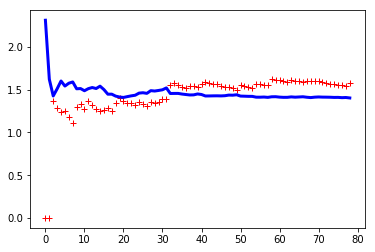

In [42]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg, X, y)

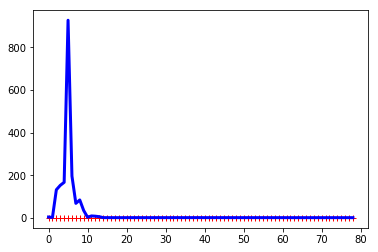

NameError: name 'save_fig' is not defined

In [43]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("sgd_reg", LinearRegression()),
    ))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
save_fig("learning_curves_plot")
plt.show()

In [ ]:
X_val.shape

In [ ]:
model.fit(X_train[:4], y_train[:4])

### 릿지 회귀
규제가 추가된 선형 회귀 버전

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg = Ridge(alpha=1, solver ="cholesky")

In [ ]:
ridge_reg.fit(X, y)

In [ ]:
ridge_reg.predict([[1.5]])

In [ ]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

### Early Stopping (조기종료)

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline((
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ))

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)


In [ ]:
X_train_poly_scaled.shape

In [ ]:
X_val_poly_scaled.shape

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005,
                       random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < minimum_val_error:
        #minimum보다 크면 걔를 미니멈으로 change. 
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

best_epoch, best_model


In [ ]:
minimum_val_error = float("inf")

In [ ]:
minimum_val_error

### Logistic Regression(Classification)

In [44]:
from sklearn import datasets

In [45]:
iris = datasets.load_iris()

In [47]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [52]:
X = iris["data"][:, 3:] #꽃의 너비
y = (iris["target"]==2).astype(np.int)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
log_reg = LogisticRegression()

In [55]:
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # 0부터 3사이 1000개 만듬

In [62]:
y_proba = log_reg.predict_proba(X_new)

In [63]:
y_proba #1열은 맞을 확률, 2열은 틀릴 확률

array([[ 0.98552764,  0.01447236],
       [ 0.98541511,  0.01458489],
       [ 0.98530171,  0.01469829],
       ..., 
       [ 0.02620686,  0.97379314],
       [ 0.02600703,  0.97399297],
       [ 0.02580868,  0.97419132]])

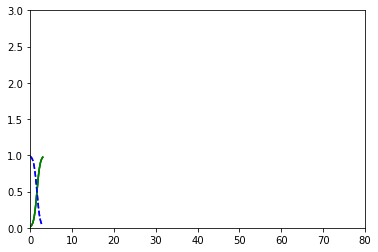

In [66]:
plt.plot(X_new, y_proba[:, 1], 'g-', label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], 'b--', label="Iris-Virginica X")
plt.show()

In [68]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax Regression

In [69]:
X = iris["data"][:, (2, 3)]

In [71]:
y = iris["target"]

In [86]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)

In [87]:
softmax_reg

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
softmax_reg.predict([[5, 2]])

array([2])

In [92]:
softmax_reg.predict_proba([[5, 2]])  #확률이 제일 높은것을 선택

array([[  6.33134076e-07,   5.75276067e-02,   9.42471760e-01]])